In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("../") 
import src 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


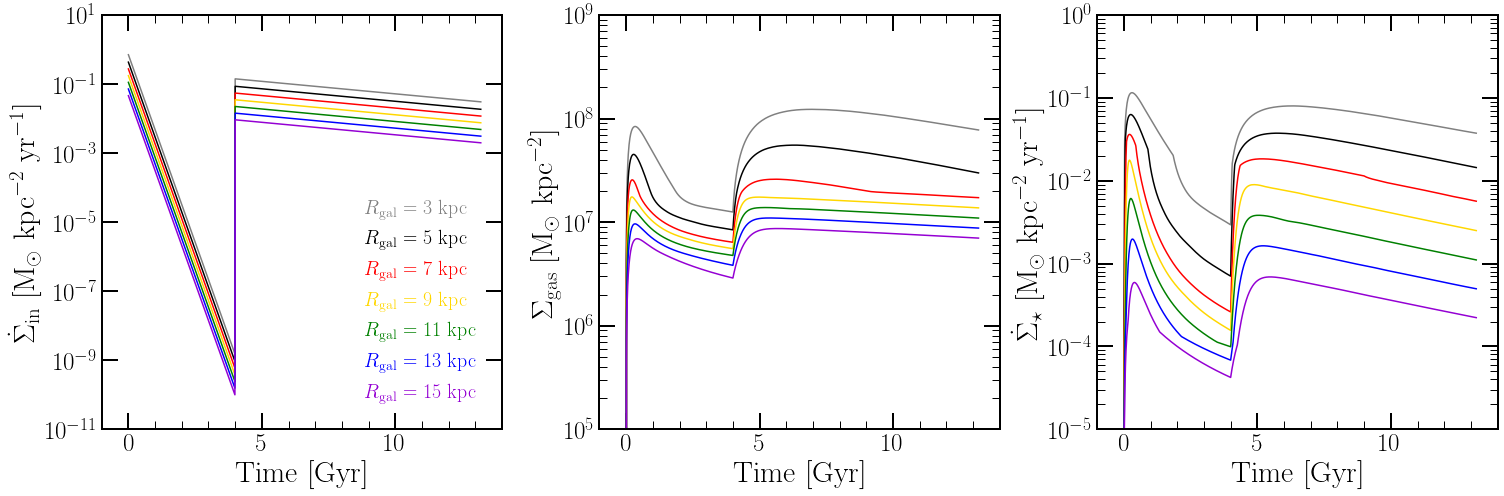

In [2]:
fig = plt.figure(figsize = (21, 7), facecolor = "white") 
axes = [] 
for i in range(3): 
    axes.append(fig.add_subplot(131 + i)) 
ylabels = [r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]", 
    r"$\Sigma_\text{gas}$ [M$_\odot$ kpc$^{-2}$]", 
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]"] 
ylim = [
    [1.e-11, 10], 
    [1.e5, 1.e9], 
    [1.e-5, 1.] 
]
for i in range(len(axes)): 
    axes[i].set_xlabel("Time [Gyr]") 
    axes[i].set_ylabel(ylabels[i]) 
    axes[i].set_yscale("log") 
    axes[i].set_xlim([-1, 14]) 
    axes[i].set_ylim(ylim[i]) 
out = vice.output("../outputs/diffusion/twoinfall_highres") 
zonewidth = 0.1 
radii = [3, 5, 7, 9, 11, 13, 15] 
colors = ["grey", "black", "red", "gold", "green", "blue", "darkviolet"] 
for i in range(len(radii)): 
    zone = "zone%d" % (int(radii[i] / zonewidth)) 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": r"$R_\text{gal}$ = %g kpc" % (radii[i]) 
    } 
    area = np.pi * ((radii[i] + zonewidth)**2 - radii[i]**2) 
    sigma_ifr = [_ / area for _ in out.zones[zone].history["ifr"]] 
    sigma_gas = [_ / area for _ in out.zones[zone].history["mgas"]] 
    sigma_sfr = [_ / area for _ in out.zones[zone].history["sfr"]] 
    axes[0].plot(out.zones[zone].history["time"], sigma_ifr, **kwargs) 
    axes[1].plot(out.zones[zone].history["time"], sigma_gas, **kwargs) 
    axes[2].plot(out.zones[zone].history["time"], sigma_sfr, **kwargs) 
leg = axes[0].legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, 
    frameon = False, fontsize = 20, bbox_to_anchor = (0.98, 0.02), handlelength = 0)  
for i in range(len(radii)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 

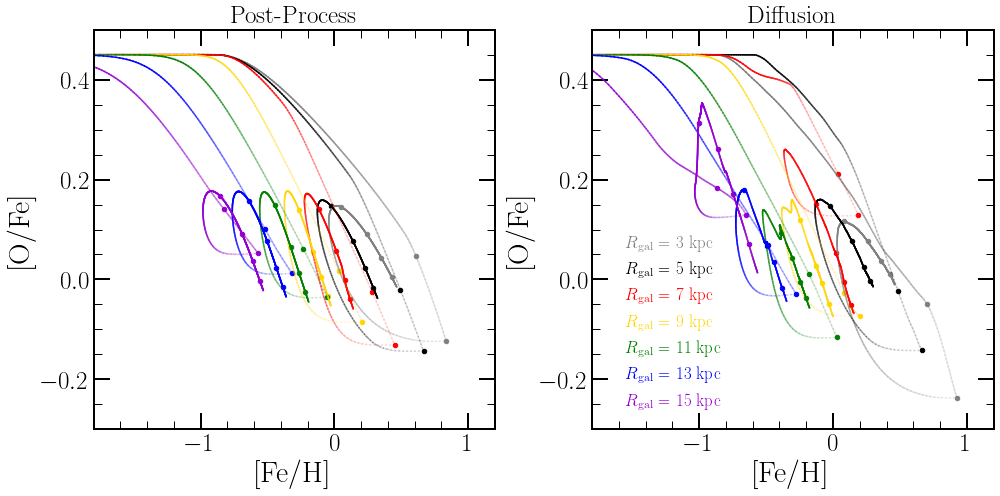

In [10]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
for ax in [ax1, ax2]: 
    ax.set_xlabel("[Fe/H]") 
    ax.set_ylabel("[O/Fe]") 
    ax.set_xlim([-1.8, 1.2]) 
    ax.set_ylim([-0.3, 0.5])
ax1.set_title("Post-Process", fontsize = 25) 
ax2.set_title("Diffusion", fontsize = 25) 
diffusion = vice.output("../outputs/diffusion/twoinfall_highres") 
postprocess = vice.output("../outputs/post-process/twoinfall_highres") 
zonewidth = 0.1 
radii = [3, 5, 7, 9, 11, 13, 15] 
colors = ["grey", "black", "red", "gold", "green", "blue", "darkviolet"] 
# times = range(1, 14) 
times = [2, 4, 6, 8, 10, 12]

def get_alphas(zone): 
    max_sfr = max(zone.history["sfr"]) 
    return [_ / max_sfr for _ in zone.history["sfr"]] 

for i in range(len(radii)): 
    zone = "zone%d" % (int(radii[i] / zonewidth)) 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    alphas = get_alphas(diffusion.zones[zone]) 
    for j in range(len(diffusion.zones[zone].history["time"]) - 1): 
        kwargs["alpha"] = alphas[j] 
        ax2.plot(diffusion.zones[zone].history["[fe/h]"][j:j + 2], 
            diffusion.zones[zone].history["[o/fe]"][j:j + 2], **kwargs) 
        ax1.plot(postprocess.zones[zone].history["[fe/h]"][j:j + 2], 
            postprocess.zones[zone].history["[o/fe]"][j:j + 2], **kwargs) 
    kwargs["alpha"] = 0.2 
    kwargs["linestyle"] = ':' 
    ax1.plot(postprocess.zones[zone].history["[fe/h]"], postprocess.zones[zone].history["[o/fe]"], 
        **kwargs) 
    ax2.plot(diffusion.zones[zone].history["[fe/h]"], diffusion.zones[zone].history["[o/fe]"], 
        label = r"$R_\text{gal}$ = %g kpc" % (radii[i]), **kwargs) 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "marker": plots.mpltoolkit.markers()["circle"], 
        "s": 20
    }
    for j in range(len(times)): 
        diff = [abs(_ - times[j]) for _ in diffusion.zones[zone].history["time"]] 
        idx = diff.index(min(diff)) 
        ax1.scatter([postprocess.zones[zone].history["[fe/h]"][idx]], 
            [postprocess.zones[zone].history["[o/fe]"][idx]], **kwargs) 
        ax2.scatter([diffusion.zones[zone].history["[fe/h]"][idx]], 
            [diffusion.zones[zone].history["[o/fe]"][idx]], **kwargs) 
leg = ax2.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False, 
    fontsize = 17, bbox_to_anchor = (0.01, 0.01), handlelength = 0) 
for i in range(len(radii)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("tracks.%s" % (ext)) 

In [2]:
import src 
src.plots.ofe_feh_densitymap("../outputs/diffusion/twoinfall_highres", "../outputs/post-process/twoinfall_highres", 
    "ofe_feh_diagram_highres_age") 

../src/plots/plots/ofe_feh_densitymap.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


3503
6963
3969
3162
4508
2282
8185
1829
8183
1321
4421
4146
6925
6852
10377
5213
12613
4119
11067
851
9138
56876
11272
58989
17103
44257
22613
19403
31822
2760


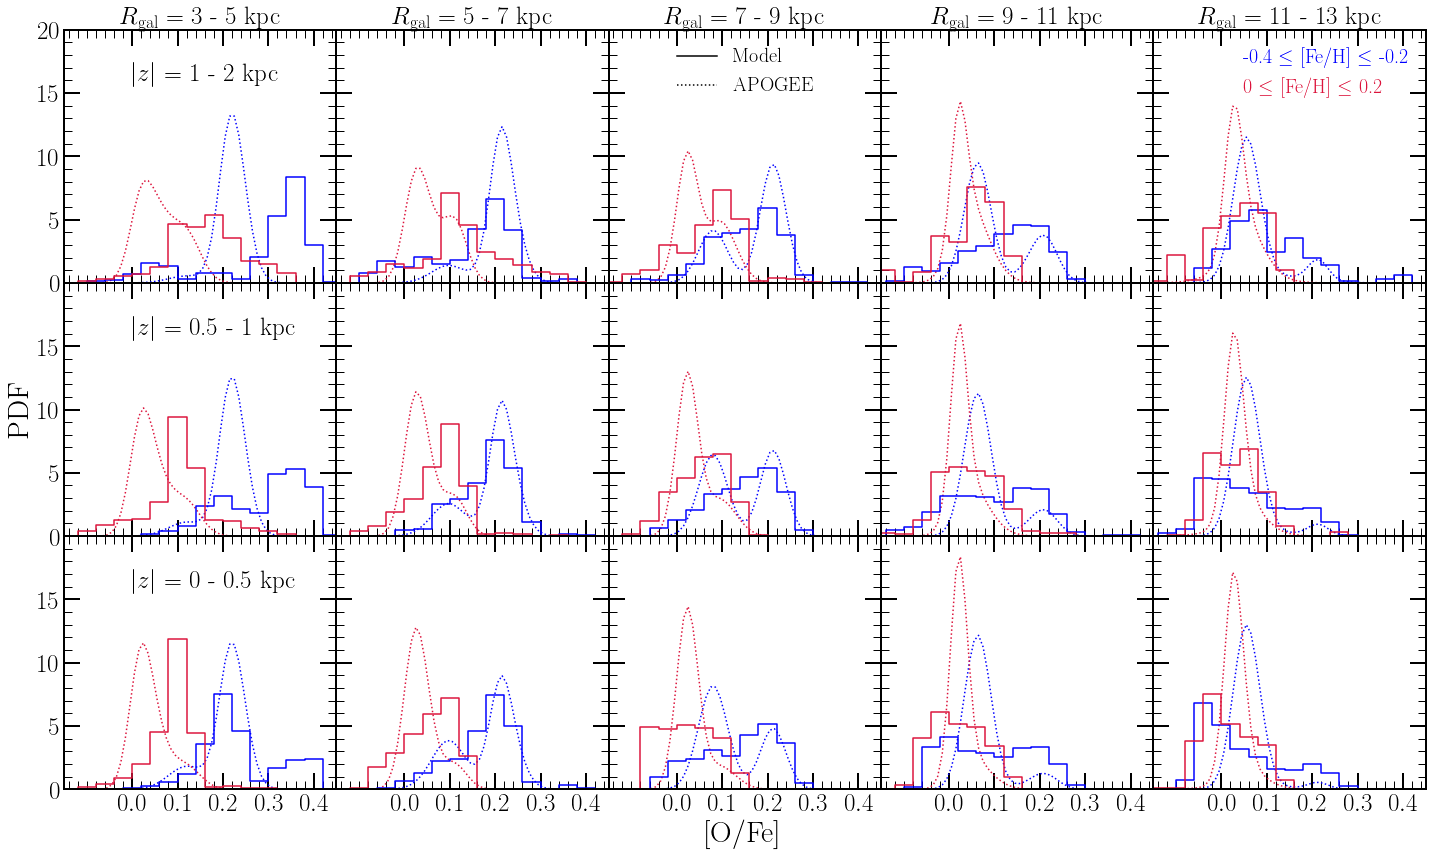

In [2]:
src.plots.ofe_mdfs("../outputs/diffusion/twoinfall_highres", "ofe_mdfs_twoinfall_highres") 

In [3]:
src.plots.ofe_feh_densitymap("../outputs/post-process/twoinfall_highres", 
    "../outputs/post-process/twoinfall_highres", 
    "ofe_feh_diagram_postprocess_age") 

../src/plots/plots/ofe_feh_densitymap.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


5946
7491
5450
8399
13233
2569
10738
519
5300
223
2321
5285
9347
4248
9323
4433
11945
2524
11753
545
6003
47914
12020
52519
18603
40196
21943
10336
24514
2136


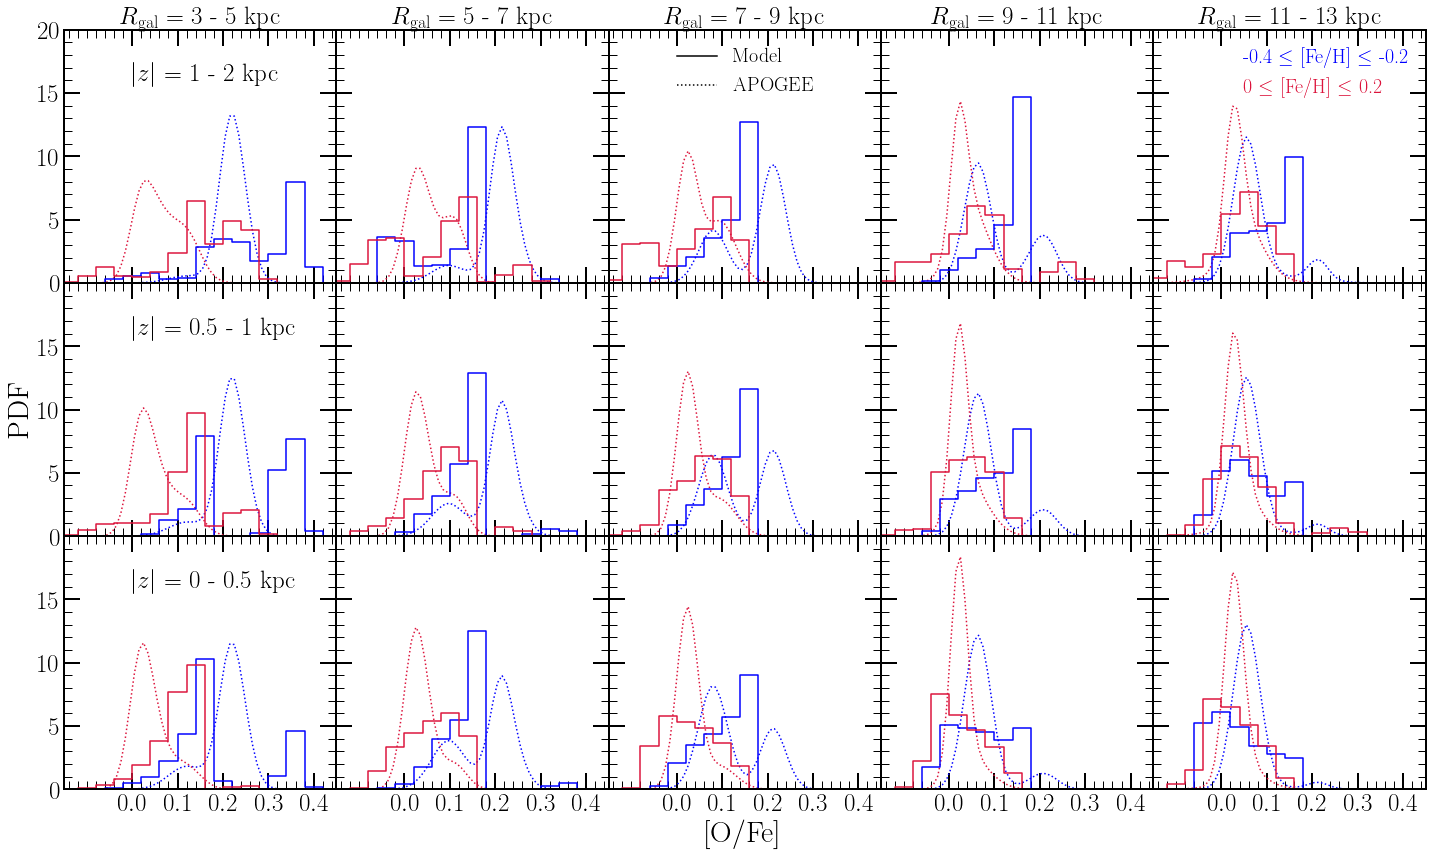

In [3]:
src.plots.ofe_mdfs("../outputs/post-process/twoinfall_highres", "ofe_mdfs_twoinfall_postprocess") 